# Projet : Chaos PSO 

On commence par importer les libairies nécessaires :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from copy import deepcopy 
from scipy.stats import qmc

## 1/ Chaos maps

On implémente ici quelques chaos maps (celles qui nous intéressera est la Arnolds Cat Map).

In [3]:
# Nombre d'itération maximum
k_max = 500 

# Tableau des X_k
X = np.zeros(k_max)

#Tableau des Y_k
Y = np.zeros(k_max)

### - Logistic map

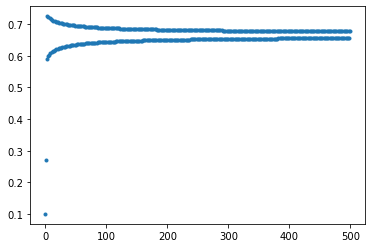

In [4]:
# Copie de X
X_lg = X

# Initialisation de mu (entre 0 et 4):
mu = 3

# Initialisation de X_0 :
X_lg[0] = 0.10

# Itération :
for k in range(1, k_max):
    X_lg[k] = mu * X_lg[k-1] * (1-X_lg[k-1]) 
    
# On affiche le graphique :
plt.plot(X_lg, '.')


### - Dissipative map

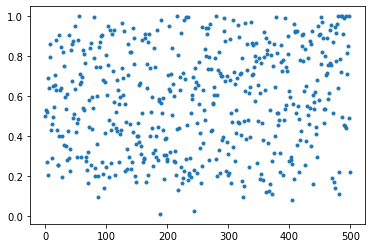

In [5]:
# Copie de X
X_dm = X

# Copie de Y
Y_dm = Y

# Initialisation de a et b :
a = 0.6
b = 8.8

# Initialisation de X_0 et Y_0 :
X_dm[0] = math.pi
Y_dm[0] = math.pi

# Itération :
for k in range(1, k_max):
    Y_dm[k] = (a * Y_dm[k-1] + b * math.sin(X_dm[k-1])) % 2 * math.pi
    X_dm[k] = (X_dm[k-1] + Y_dm[k]) % 2 * math.pi
    

for k in range(0, k_max):
    if Y_dm[k] > 1 :
        Y_dm[k] = (Y_dm[k] - np.min(Y_dm)) / (np.max(Y_dm) - np.min(Y_dm))
    if X_dm[k] > 1 :
        X_dm[k] = (X_dm[k] - np.min(X_dm)) / (np.max(X_dm) - np.min(X_dm))
    
# On affiche le graphique :
plt.plot(X_dm, '.')


### - Arnolds Cat map

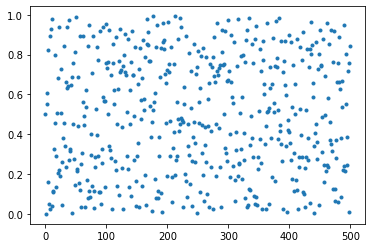

In [6]:
# Copie de X
X_acm = X

# Copie de Y
Y_acm = Y

# Initialisation de a :
a = 0.1

# Initialisation de X_0 et Y_0 :
X_acm[0] = 0.5
Y_acm[0] = 0.5

# Itération :
for k in range(1, k_max):
    X_acm[k] = (X_acm[k-1] + Y_acm[k-1]) % 1
    Y_acm[k] = (X_acm[k-1] + a * Y_acm[k-1]) % 1
    
for k in range(0, k_max):
    if Y_acm[k] > 1 :
        Y_acm[k] = (Y_acm[k] - np.min(Y_acm)) / (np.max(Y_acm) - np.min(Y_acm))
    if X_acm[k] > 1 :
        X_acm[k] = (X_acm[k] - np.min(X_acm)) / (np.max(X_acm) - np.min(X_acm))
      
    
# On affiche le graphique :
plt.plot(X_acm, '.')
  

    
# La Arnold's cat map sous forme de fonction
def acm(X, Y, k_max):
    # Copie de X
    X_acm = X

    # Copie de Y
    Y_acm = Y

    # Initialisation de a :
    a = 0.1

    # Initialisation de X_0 et Y_0 :
    X_acm[0] = 0.5
    Y_acm[0] = 0.5

    # Itération :
    for k in range(1, k_max):
        X_acm[k] = (X_acm[k-1] + Y_acm[k-1]) % 1
        Y_acm[k] = (X_acm[k-1] + a * Y_acm[k-1]) % 1

    for k in range(0, k_max):
        if Y_acm[k] > 1 :
            Y_acm[k] = (Y_acm[k] - np.min(Y_acm)) / (np.max(Y_acm) - np.min(Y_acm))
        if X_acm[k] > 1 :
            X_acm[k] = (X_acm[k] - np.min(X_acm)) / (np.max(X_acm) - np.min(X_acm))
            
    return X_acm
   

## 2/ fonction PSO

On implémente ici notre fonction pour la PSO 

In [7]:
def PSO(f, P_0, V_0, K_max, w, r, X_min, X_max):
    
    P_k = deepcopy(P_0)
    V_k = deepcopy(V_0)
    
    # Taille de la population
    dim_pop = np.size(P_0, 0)
    
    # Taille des vecteurs 
    dim_part = np.size(P_0, 1)
    
    # Array contenant le personnal best pour chaque x_i
    pb = deepcopy(P_k) 
    
    # Global best
    gb = P_k[0] 
    for i in range(dim_pop):
         if (f(gb) > f(pb[i])):
                gb = pb[i]
                
    # On itère 
    for k in range(1, K_max):
    
        # on itère pour trouver Vik+1 et Xik+1 en fonction de Vik et de Xik 
        for i in range(dim_pop):
            V_k[i,:] = w[0] * V_k[i,:] + r[k] * w[1] *(pb[i,:] - P_k[i,:]) + r[k] * w[2] * (gb - P_k[i,:])
            P_k[i,:] += V_k[i,:]
            
            # on met à jour les Xik pour qu'ils restent dans l'intervalle [Xmin,Xmax]
            for j in range(dim_part):
                P_k[i][j] = min(X_max, max(P_k[i][j], X_min))
            
            # On détermine  les pb
            if(f(pb[i]) > f(P_k[i])):
                pb[i] = P_k[i]
            
            # On détermine  les gb
            if (f(gb) > f(pb[i])):
                gb = pb[i]
    
    # Au bout de K_max itérations on renvoie le global best (ce vers quoi le nuage de points converge)
    return gb
        
    
    

## 3/ benchmark de référence

Les deux fonctions qui nous permettront de vérifier notre fonction de PSO sont les suivantes :

#### - Schaffer 4

In [8]:
def schaffer4 (X) :
    return 0.5 + (np.cos( np.sin( abs(X[0]**2 + X[1]**2) ) )**2 - 0.5) / ( 1 + 0.001 * (X[0]**2 + X[1]**2))**2

#### - Rastrigin

In [9]:
def rastrigin(X) :
    A = 10    
    return A*np.size(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

## 4/ Test

Testons maintenant notre fonction de PSO sur :

__Schaffer4__

Génération de la population :

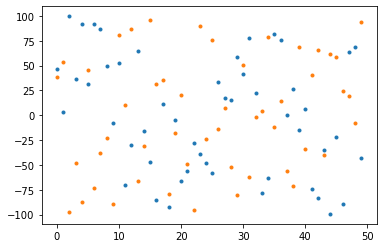

In [10]:
# On def les bornes de l'intervalle [a,b]
borne_Inf = - 100
borne_Sup = 100

# Dimension de la population (P)
dim_population = 50

# Dimension des particules (D)
dim_particule = 2


# Définit la population 
a = np.ones(dim_particule) * borne_Inf
b = np.ones(dim_particule) * borne_Sup
pop = qmc.LatinHypercube(dim_particule)
P_0 = qmc.scale(pop.random(n=dim_population), a, b)


plt.plot(P_0, '.')


Test de la PSO sur la fonction Schaffer4 :

In [11]:
# Vitesses initiales
V_0 = np.array([[0.0 for i in range(dim_particule)] for j in range(dim_population)])

# k_max
k_max = 500

# w 
w = np.array([0.8, 0.1, 0.1])

print(PSO(schaffer4, P_0, V_0, k_max, w, X_acm, borne_Inf, borne_Sup))
print(schaffer4(PSO(schaffer4, P_0, V_0, k_max, w, X_acm, borne_Inf, borne_Sup)))

[1.23391107 0.21863868]
0.2925786320359804



__Rastrigin__

Génération de la population :


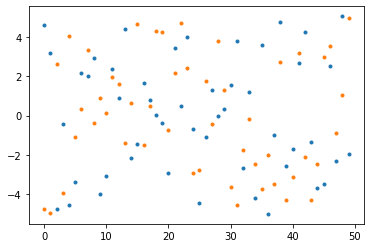

In [12]:
# On def les bornes de l'intervalle [a,b]
borne_Inf = - 5.12
borne_Sup = 5.12

# Dimension de la population (P)
dim_population = 50

# Dimension des particules (D)
dim_particule = 2


# Définit la population 
a = np.ones(dim_particule) * borne_Inf
b = np.ones(dim_particule) * borne_Sup
pop = qmc.LatinHypercube(dim_particule)
P_0 = qmc.scale(pop.random(n=dim_population), a, b)


plt.plot(P_0, '.')


Test de la PSO sur la fonction Rastrigin :

In [13]:
# Vitesses initiales
V_0 = np.array([[0.0 for i in range(dim_particule)] for j in range(dim_population)])

# k_max
k_max = 500

# w 
w = np.array([0.8, 0.1, 0.1])

PSO_R =  PSO(rastrigin, P_0, V_0, k_max, w, X_acm, borne_Inf, borne_Sup)
print(PSO_R)
print(rastrigin(PSO_R))

[ 3.07990443e-09 -1.36678416e-09]
0.0


## 5/ Evolution de la popultaion suivant le nombre d'itérations :

On réprésente, pour les deux fonctions de tests, l'évolution des populations en fonction du nombre d'itération. Pour cela, on définit deux fonctions : une fonction qui permet l'affichage des graphiques, et une nouvelle fonction PSO nommée peso pour permettre l'affichage depuis certaines itérations.


In [14]:
# Fonction
def affichage(pox, posy, posz, Z, dim_pop, P_k, gb, color):
    
    # On veut affcher le 500e sur le 4ème emplacement.
    if(posz == k_max-1):
        plt.subplot(pox, posy, 4)
        
    # Sinon on affiche sur le posz
    else:
        plt.subplot(pox, posy, posz)
        
    plt.title("Population au rang : " + str(posz))
        
    # On affiche le graphique
    plt.imshow(Z, interpolation="bicubic", origin="lower", extent=[borne_Inf, borne_Sup, borne_Inf, borne_Sup])
    
    # On affiche les points
    for i in range(dim_pop):
        plt.scatter(P_k[i][0],P_k[i][1], c = color, s = 5)
        
    plt.scatter(gb[0], gb[1], c = 'black', s = 10)


# Fonction PSO dédié à l'affichage des fonctions
def peso(f, P_0, V_0, K_max, w, r, X_min, X_max):
    fig = plt.figure(figsize=(10, 7))
    
    x = np.linspace(borne_Inf, borne_Sup, 500)
    y = np.linspace(borne_Inf, borne_Sup, 500)
    X, Y = np.meshgrid(x, y)
    
    # calcul du tableau des valeurs de Z
    Z = f([X,Y]) 
    
    P_k = deepcopy(P_0)
    V_k = deepcopy(V_0)
    
    # Taille de la population
    dim_pop = np.size(P_0, 0)
    
    # Taille des vecteurs 
    dim_part = np.size(P_0, 1)
    
    for i in range(dim_pop):
        plt.scatter(P_0[i][0],P_0[i][1], c = 'yellow', s = 5)
        #plt.scatter(P_k[i][0],P_k[i][1], c = 'red', s = 5)
    plt.arrow(P_0[0][0],P_0[0][1],V_0[0][0],V_0[0][1], width = 0.025,  color = 'brown')     
    
    # Array contenant le personnal best pour chaque x_i
    pb = deepcopy(P_k) 
    
    # Global best
    gb = P_k[0] 
    P_gb = deepcopy(P_k)
    V_gb = deepcopy(V_k)
    
    for i in range(dim_pop):
         if (f(gb) > f(pb[i])):
                gb = pb[i]
                
    # On itère 
    for k in range(1, K_max):
    
        # on itère pour trouver Vik+1 et Xik+1 en fonction de Vik et de Xik 
        for i in range(dim_pop):
            V_k[i,:] = w[0] * V_k[i,:] + r[k] * w[1] *(pb[i,:] - P_k[i,:]) + r[k] * w[2] * (gb - P_k[i,:])
            P_k[i,:] += V_k[i,:]
            # on met à jour les Xik pour qu'ils restent dans l'intervalle [Xmin,Xmax]
            for j in range(dim_part):
                P_k[i][j] = min(X_max, max(P_k[i][j], X_min))
            
            # On détermine  les pb
            if(f(pb[i]) > f(P_k[i])):
                pb[i] = P_k[i]
            
            # On détermine  les gb
            if (f(gb) > f(pb[i])):
                gb = pb[i]
        
        # On affiche les grpahs pour les itérations 1, 2, 3 et k_max-1.
        if (k == 1):
            affichage(2, 2, k, Z, dim_pop, P_k, gb, 'yellow')
        if (k == 2):
            affichage(2, 2, k, Z, dim_pop, P_k, gb, 'yellow')
        if (k == 3):
            affichage(2, 2, k, Z, dim_pop, P_k, gb, 'yellow')
        if (k == k_max-1):
            affichage(2, 2, k, Z, dim_pop, P_k, gb, 'yellow')
        
        
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.show()
    # Au bout de K_max itérations on renvoie le global best (ce vers quoi le nuage de points converge)
    
    return gb

__Schaffer n°4__

On observe l'évolution des populations vers le minimum de la fonction Schaffer4 :

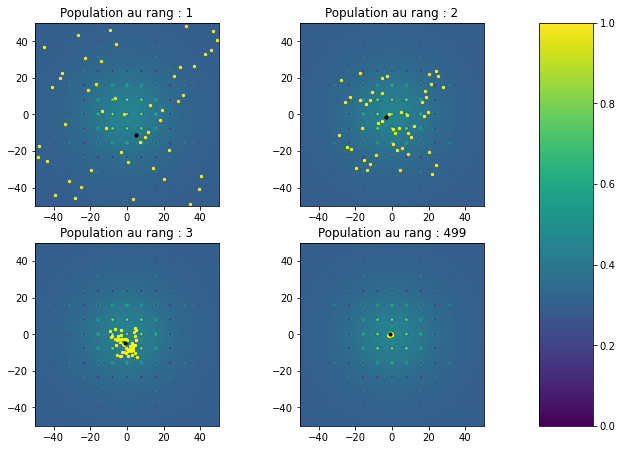

global best :  [-1.2528294  -0.02752969]
f(gb) =  0.2925786320359805


In [15]:
# On re-def les bornes de l'intervalle [a,b] (pour plus de lisibilité)
borne_Inf = - 50
borne_Sup = 50

# Re-Définit la population 
a = np.ones(dim_particule) * borne_Inf
b = np.ones(dim_particule) * borne_Sup
pop = qmc.LatinHypercube(dim_particule)
P_0 = qmc.scale(pop.random(n=dim_population), a, b)


gb = peso(schaffer4, P_0, V_0, k_max, np.array([0.8, 0.8, 0.8]),X_lg , borne_Inf, borne_Sup)
print("global best : ",gb)
print("f(gb) = ",schaffer4(gb))

#### Rastrigin

On observe l'évolution des populations vers le minimum de la fonction Rastrigin.

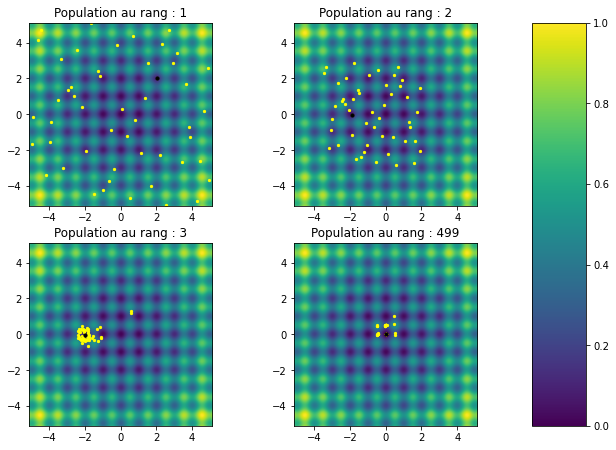

global best :  [-3.66931753e-09 -2.43298169e-10]
f(gb) =  0.0


In [16]:
# On re-definit les bornes de l'intervalle [a,b]
borne_Inf = - 5.12
borne_Sup = 5.12

# On re-Définit la population 
a = np.ones(dim_particule) * borne_Inf
b = np.ones(dim_particule) * borne_Sup
pop = qmc.LatinHypercube(dim_particule)
P_0 = qmc.scale(pop.random(n=dim_population), a, b)

# Fonction pour afficher Rastrigin dans les graphiques.
def rastriginGraph(X) :
    return (20 + (X[0]**2 - 10 * np.cos(2 * math.pi * X[0])) + (X[1]**2 - 10 * np.cos(2 * math.pi * X[1])))


gb = peso(rastriginGraph, P_0, V_0, k_max, np.array([0.8, 0.8, 0.8]),X_lg , borne_Inf, borne_Sup)
print("global best : ",gb)
print("f(gb) = ",rastrigin(gb))

## 6/ Etude paramétrique

On étudie les différences de minimisation en fonction des paramètres choisis pour la PSO. Pour cela on définit la fonction suivante :

In [17]:
def etudeParametrique(f, minimize, P, D, K, borne_Inf, borne_Sup) :
    # On initialise les omega
    w = [0.767677,0.505051,0.828283]

    # On defini les vecteurs d'erreurs en fonctions des tailles des arrays P, D et K
    erreur_chaos = np.zeros(np.size(P)*np.size(D)*np.size(K))
    erreur_random = np.zeros(np.size(P)*np.size(D)*np.size(K))
    i=0

    # Iteration parmi les differentes tailles de population
    for p in P:
        # Iteration parmi les differentes dimensions de particules
        for d in D:    
            # Iteration parmi les differents k_max proposés
            for k in K:

                # On reinitialise les vitesses initiales a chaques changements 
                V_0 = np.array([[0.0 for i in range(d)] for j in range(p)])

                # On reinitialise les populations a chaques changements 
                a = np.ones(d) * borne_Inf
                b = np.ones(d) * borne_Sup
                pop = qmc.LatinHypercube(d)
                P_0 = qmc.scale(pop.random(n=p), a, b)
                
                # On reinitialise les r a chaques changements 
                r_random = np.random.rand(k)
                r_chaos = acm(np.zeros(k), np.zeros(k), k)
                
                # On calcul les PSO pour les differents r
                PSO_chaos = PSO(f, P_0, V_0, k, w, r_chaos, borne_Inf, borne_Sup )
                PSO_random = PSO(f, P_0, V_0, k, w, r_random, borne_Inf, borne_Sup )

                # On stock les differentes erreurs
                if (abs (f(minimize))==0) :
                    erreur_chaos[i] = abs(f(PSO_chaos))
                    erreur_random[i] = abs(f(PSO_random))

                else :
                    erreur_chaos[i] = abs(f(PSO_chaos) - f(minimize)) / abs (f(minimize))
                    erreur_random[i] = abs(f(PSO_random) - f(minimize)) / abs (f(minimize))
                
                i+=1
    return erreur_chaos, erreur_random

__Schuffer__ :

On test d'abord l'influence de la taille de population sur la PSO de la fonction Schaffer 4 :

[1.06450530e-02 8.48253554e-04 8.25292453e-04 1.44069077e-07
 1.34394306e-07 2.04862837e-08]
[8.91578477e-03 7.39796342e-04 9.29349466e-05 5.26903080e-06
 4.02531269e-07 1.19217702e-09]


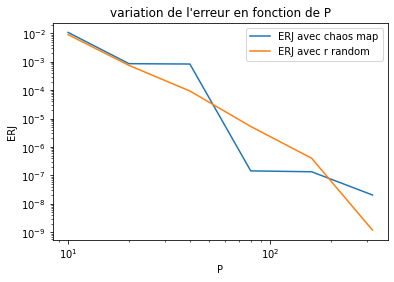

In [18]:

minimize = np.array([0,1.25313])

# Taille des populations
P = np.array([10, 20, 40, 80, 160, 320])

# Dimension des particules
D = np.array([2])

# Nombre d'itérations
K = np.array([50])

n = np.size(P)

borne_inf = -100
borne_sup = 100

erreur_chaos = np.zeros((n,n))
erreur_random = np.zeros((n,n))

for i in range(n):
    [erreur_chaos[i], erreur_random[i]] = etudeParametrique(schaffer4, minimize, P, D, K, borne_inf, borne_sup)


print(np.mean(erreur_chaos, axis=0))
print(np.mean(erreur_random, axis=0))


plt.loglog(P,np.mean(erreur_chaos, axis=0))
plt.loglog(P,np.mean(erreur_random, axis=0))
plt.xlabel("P", size = 10)
plt.ylabel("ERJ", size = 10)
plt.title("variation de l'erreur en fonction de P")
plt.legend(["ERJ avec chaos map","ERJ avec r random"])
plt.show()


On test l'influence de la taille de k sur la PSO de la fonction Schaffer 4 :

[3.46683272e-02 4.08233958e-06 6.32944908e-10 3.26386529e-11
 3.26386908e-11]
[2.62490279e-02 2.51040557e-07 2.93055613e-09 3.26386529e-11
 3.26387667e-11]


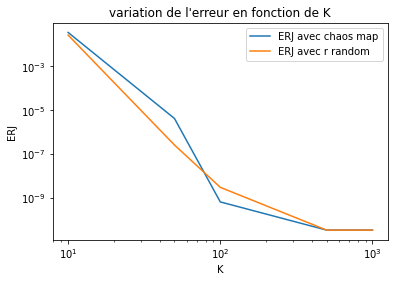

In [19]:
minimize = np.array([0,1.25313])

# Taille des populations
P = np.array([40])

# Dimension des particules
D = np.array([2])

# Nombre d'itérations
K = np.array([10, 50, 100, 500, 1000])

n = np.size(K)

borne_inf = -100
borne_sup = 100

erreur_chaos = np.zeros((n,n))
erreur_random = np.zeros((n,n))

for i in range(n):
    [erreur_chaos[i], erreur_random[i]] = etudeParametrique(schaffer4, minimize, P, D, K, borne_inf, borne_sup)

print(np.mean(erreur_chaos, axis=0))
print(np.mean(erreur_random, axis=0))


plt.loglog(K,np.mean(erreur_chaos, axis=0))
plt.loglog(K,np.mean(erreur_random, axis=0))
plt.xlabel("K", size = 10)
plt.ylabel("ERJ", size = 10)
plt.title("variation de l'erreur en fonction de K")
plt.legend(["ERJ avec chaos map","ERJ avec r random"])
plt.show()

__Rastrigin__ :

On test l'influence de la taille de population sur la PSO de la fonction Rastrigin

[1.99171965e+00 4.98278143e-01 4.98126262e-01 3.31660324e-01
 1.65827492e-01 6.00785549e-08]
[9.98116563e-01 4.97657430e-01 8.30292613e-01 1.65837528e-01
 1.51224580e-05 8.28483642e-07]


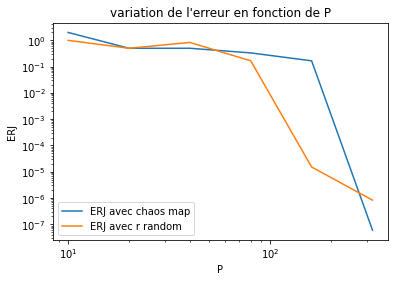

In [20]:

minimize = np.array([0, 0])

# Taille des populations
P = np.array([10, 20, 40, 80, 160, 320])

# Dimension des particules
D = np.array([2])

# Nombre d'itérations
K = np.array([50])

n = np.size(P)

borne_inf = -5.12
borne_sup = 5.12

erreur_chaos = np.zeros((n,n))
erreur_random = np.zeros((n,n))

for i in range(n):
    [erreur_chaos[i], erreur_random[i]] = etudeParametrique(rastrigin, minimize, P, D, K, borne_inf, borne_sup)


print(np.mean(erreur_chaos, axis=0))
print(np.mean(erreur_random, axis=0))


plt.loglog(P,np.mean(erreur_chaos, axis=0))
plt.loglog(P,np.mean(erreur_random, axis=0))
plt.xlabel("P", size = 10)
plt.ylabel("ERJ", size = 10)
plt.title("variation de l'erreur en fonction de P")
plt.legend(["ERJ avec chaos map","ERJ avec r random"])
plt.show()



On test l'influence du nombre d'iteration sur la PSO de la fonction Rastrigin

[1.25468144 0.39799217 0.79596734 0.19899181 0.99495906]
[0.81411674 0.79607023 0.39798395 0.39798362 0.39798362]


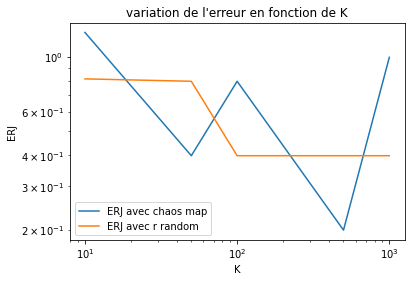

In [21]:

minimize = np.array([0, 0])

# Taille des populations
P = np.array([40])

# Dimension des particules
D = np.array([2])

# Nombre d'itérations
K = np.array([10, 50, 100, 500, 1000])

n = np.size(K)

borne_inf = -5.12
borne_sup = 5.12

erreur_chaos = np.zeros((n,n))
erreur_random = np.zeros((n,n))

for i in range(n):
    [erreur_chaos[i], erreur_random[i]] = etudeParametrique(rastrigin, minimize, P, D, K, borne_inf, borne_sup)


print(np.mean(erreur_chaos, axis=0))
print(np.mean(erreur_random, axis=0))


plt.loglog(K,np.mean(erreur_chaos, axis=0))
plt.loglog(K,np.mean(erreur_random, axis=0))
plt.xlabel("K", size = 10)
plt.ylabel("ERJ", size = 10)
plt.title("variation de l'erreur en fonction de K")
plt.legend(["ERJ avec chaos map","ERJ avec r random"])
plt.show()


On test l'influence de la dimension des particules sur la PSO de la fonction Rastrigin

[1.99819644e-01 6.84221943e+00 1.90582619e+01 3.10295161e+02
 7.49033804e+02]
[8.14229990e-04 4.99751309e+00 1.52391654e+01 2.74117091e+02
 7.19001659e+02]


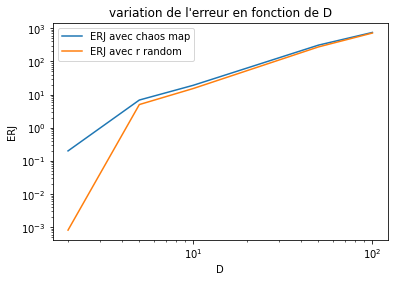

In [22]:

minimize = np.array([0, 0])

# Taille des populations
P = np.array([40])

# Dimension des particules
D = np.array([2, 5, 10, 50, 100])

# Nombre d'itérations
K = np.array([50])

n = np.size(D)

borne_inf = -5.12
borne_sup = 5.12

erreur_chaos = np.zeros((n,n))
erreur_random = np.zeros((n,n))

for i in range(n):
    [erreur_chaos[i], erreur_random[i]] = etudeParametrique(rastrigin, minimize, P, D, K, borne_inf, borne_sup)


print(np.mean(erreur_chaos, axis=0))
print(np.mean(erreur_random, axis=0))


plt.loglog(D,np.mean(erreur_chaos, axis=0))
plt.loglog(D,np.mean(erreur_random, axis=0))
plt.xlabel("D", size = 10)
plt.ylabel("ERJ", size = 10)
plt.title("variation de l'erreur en fonction de D")
plt.legend(["ERJ avec chaos map","ERJ avec r random"])
plt.show()


## 7/ Graphiques en 3D  

Pour avoir une idée du fonctionnement de la PSO en 3 dimensions, nous afficherons les graphiques 3D pour la dernière itérations (pour pouvoir mieux voir les points, il faut tourner les graphiques 3D). Cette partie permet de comprendre un peu mieux l'évolution des points dans une dimension supérieure à 2. Pour ce faire, on crée la fonction suivante :

In [23]:
def peso3D(f, P_0, V_0, K_max, w, r, X_min, X_max):
    
    P_k = deepcopy(P_0)
    V_k = deepcopy(V_0)
    
    # Taille de la population
    dim_pop = np.size(P_0, 0)
    
    # Taille des vecteurs 
    dim_part = np.size(P_0, 1)
    
    # Array contenant le personnal best pour chaque x_i
    pb = deepcopy(P_k) 
    
    # Global best
    gb = P_k[0] 
    for i in range(dim_pop):
         if (f(gb) > f(pb[i])):
                gb = pb[i]
                
    # On itère 
    for k in range(1, K_max):
    
        # on itère pour trouver Vik+1 et Xik+1 en fonction de Vik et de Xik 
        for i in range(dim_pop):
            V_k[i,:] = w[0] * V_k[i,:] + r[k] * w[1] *(pb[i,:] - P_k[i,:]) + r[k] * w[2] * (gb - P_k[i,:])
            P_k[i,:] += V_k[i,:]
            
            # on met à jour les Xik pour qu'ils restent dans l'intervalle [Xmin,Xmax]
            for j in range(dim_part):
                P_k[i][j] = min(X_max, max(P_k[i][j], X_min))
            
            # On détermine  les pb
            if(f(pb[i]) > f(P_k[i])):
                pb[i] = P_k[i]
            
            # On détermine  les gb
            if (f(gb) > f(pb[i])):
                gb = pb[i]
    
    # Au bout de K_max itérations on renvoie le global best (ce vers quoi le nuage de points converge)
    fig = plt.figure() 
    ax = fig.gca(projection='3d') 
    
    X = np.arange(borne_Inf, borne_Sup, 0.1)
    Y = np.arange(borne_Inf, borne_Sup, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = f([X,Y])


    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08, antialiased=True, zorder = 1)

    for i in range(dim_pop):
        ax.scatter(P_0[i][0], P_0[i][1], f(P_0[i]), color = "black", s=75)
        ax.scatter(P_k[i][0], P_k[i][1], f(P_k[i]), color = "fuchsia", s=75, zorder = 2)


    plt.show()
    return gb

__Schaffer n°4__

C:\Users\loaiu\AppData\Local\Temp\ipykernel_26136\1289395915.py:43: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


NameError: name 'cm' is not defined

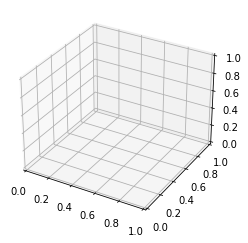

In [24]:
gbs = peso3D(schaffer4, P_0, V_0, k_max, np.array([0.8, 0.8, 0.8]),X_lg , borne_Inf, borne_Sup)
print("global best : ",gbs)
print("f(gb) = ",schaffer4(gbs))

__Rastrigin__

In [ ]:
gbr = peso3D(rastriginGraph, P_0, V_0, k_max, np.array([0.8, 0.8, 0.8]),X_lg , borne_Inf, borne_Sup)
print("global best : ",gbr)
print("f(gb) = ",rastrigin(gbr))

: 